In [17]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [18]:
%matplotlib inline

In [19]:
df = pd.read_csv('height-weight.csv')

In [20]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


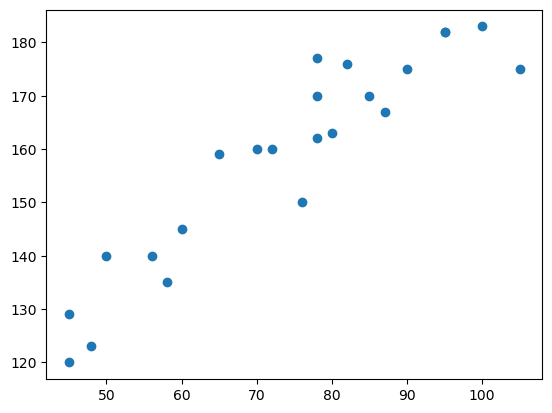

In [21]:
plt.scatter(df['Weight'], df['Height'])
plt.show()

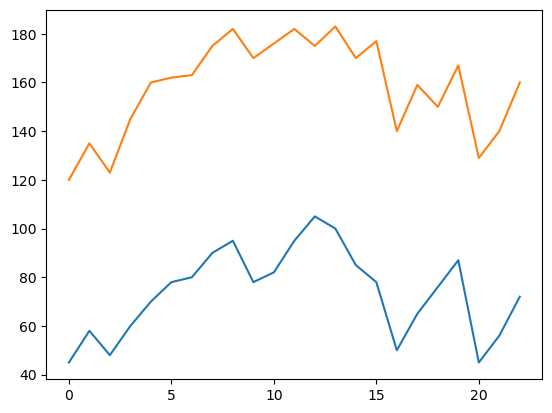

In [22]:
plt.plot(df)

Text(0, 0.5, 'Height')

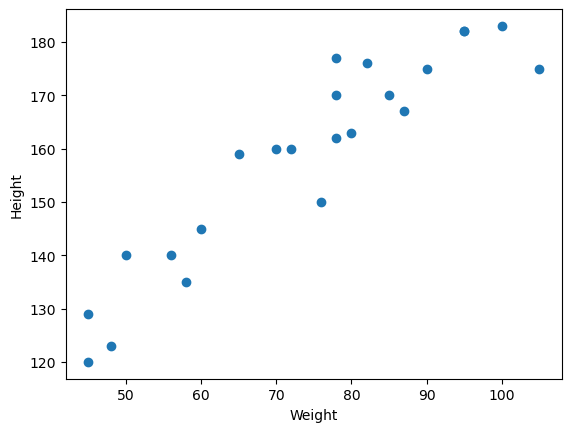

In [23]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [24]:
## Correlatin 
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


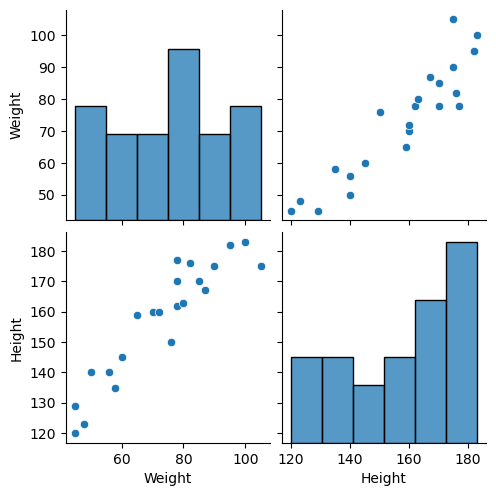

In [25]:
## Search for visualization
import seaborn as sns
sns.pairplot(df)

In [26]:
# indepentent and depentend feature
X = df[['Weight']] ## idependent feature should be dataframe or 2D array
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [27]:
np.array(X).shape

(23, 1)

In [28]:
X = df[['Weight']]

In [29]:
X.shape

(23, 1)

In [30]:
X.shap

AttributeError: 'DataFrame' object has no attribute 'shap'

In [31]:
X.shape

(23, 1)

In [32]:
X_series = df["Weight"] # Do not train with this Series either train the 
print(type(X_series))

<class 'pandas.core.series.Series'>


In [33]:
X_series.shape

(23,)

In [34]:
X.head

<bound method NDFrame.head of     Weight
0       45
1       58
2       48
3       60
4       70
5       78
6       80
7       90
8       95
9       78
10      82
11      95
12     105
13     100
14      85
15      78
16      50
17      65
18      76
19      87
20      45
21      56
22      72>

In [35]:
X.shape

(23, 1)

In [36]:
X.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [37]:
# Dependentent feature it can have 1D 
y = df['Height'] # it should be in series or 1D

In [38]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [39]:
np.array(y).shape

(23,)

In [40]:
## Train Test split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [41]:
X_train.shape # Should be 2D

(17, 1)

In [42]:
## Standardazation
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

In [44]:
X_train = scaler.fit_transform(X_train)

In [45]:
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [46]:
X_test = scaler.transform(X_test)

In [47]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [48]:
# Performing Linear Regrssion using sklearn
from sklearn.linear_model import LinearRegression

In [49]:
regression = LinearRegression(n_jobs = -1)

In [50]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [51]:
regression.coef_

array([17.2982057])

In [52]:
regression.intercept_

156.47058823529412

In [53]:
print("Coefficient or Slope: ", regression.coef_)
print("Intercept: ", regression.intercept_)

Coefficient or Slope:  [17.2982057]
Intercept:  156.47058823529412


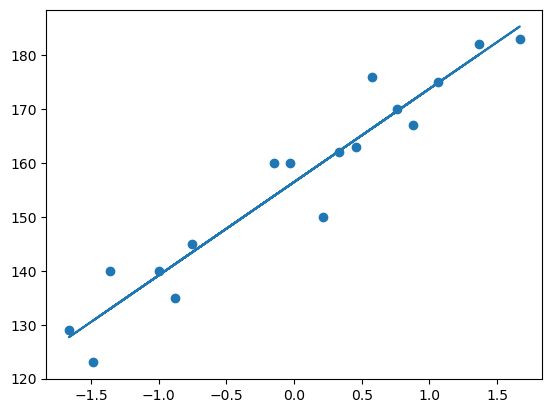

In [54]:
# Plotting the training data into fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))


## Prediction of test Data
1. predicted height=intercept+coef_(Weight)
2. y_pred_test = 156.47 + 17.29(Weight)

In [55]:
## Prediction for test data
y_pred = regression.predict(X_test)

In [56]:
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [57]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [58]:
mse = mean_squared_error(y_test, y_pred)

In [59]:
mse

114.84069295228699

In [60]:
mae = mean_absolute_error(y_test, y_pred)

In [61]:
mae

9.665125886795005

In [62]:
rmse= np.sqrt(mse)

In [63]:
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


In [64]:
y_test.shape

(6,)

# R Squre

Formula 
### R^ 2 = 1 - SSR / SST
R^2 = coefficient of dtermination SSR = Sum of square of residuals SST - totoall of squar

In [65]:
from sklearn.metrics import r2_score

In [66]:
score = r2_score(y_test, y_pred)

In [67]:
print(score)

0.7360826717981276


### Adjusted R2 = 1 - [(1 - R2)*(n - 1)/(n-k-1)]

where:
R2: The R2 of the model n: The number of observation k: The number of prdictor variable

In [68]:
print(X_test.shape[1])

1


In [69]:
print(type(X_test))

<class 'numpy.ndarray'>


In [70]:
print(X_test.shape)

(6, 1)


In [71]:
# display adjusted R-Square
1 - (1- score) * (len(y_train) - 1)/ (len(y_train) - X_test.shape[1] - 1)

0.7184881832513361

In [102]:
# OLS linear regression
import statsmodels.api as ms

In [104]:
model = ms.OLS(y_train,X_train).fit()

In [105]:
prediction = model.predict(X_test)

In [108]:
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [109]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Fri, 19 Jan 2024   Prob (F-statistic):                       0.664
Time:                        14:39:01   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

D:\Anaconda\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [110]:
# Prediction for new data
regression.predict([[72]])

array([1401.94139895])

In [111]:
# Using standization for new data 
regression.predict(scaler.transform([[72]]))

D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])